# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 593


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
#ME
#url = 'https://api.openweathermap.org/data/2.5/weather?'
#city = "London"
#city_url = f'{url}q={city}&appid={weather_api_key}'
#city_weather = requests.get(city_url).json()
#pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 51.5085, 'lon': -0.1257},
 'dt': 1682268644,
 'id': 2643743,
 'main': {'feels_like': 285.96,
          'humidity': 65,
          'pressure': 999,
          'temp': 286.84,
          'temp_max': 288.14,
          'temp_min': 284.81},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 2075535,
         'sunrise': 1682225318,
         'sunset': 1682276927,
         'type': 2},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 274, 'gust': 1.79, 'speed': 1.34}}


In [22]:
# Set the API base URL #ME after =
url = 'https://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city #ME after =
    city_url = f'{url}q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data #ME
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date #ME after =
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - 273.15),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        #print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad tula
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | inhambane
Processing Record 4 of Set 1 | saint-joseph
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | felege neway
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | shenjiamen
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | haiku-pauwela
Processing Record 14 of Set 1 | aasiaat
Processing Record 15 of Set 1 | zhob
Processing Record 16 of Set 1 | qamdo
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | lang son
Processing Record 19 of Set 1 | hawaiian paradise park
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | maputo
Processing Record 22 of Set 1 | kapa

Processing Record 42 of Set 4 | semey
Processing Record 43 of Set 4 | kangding
Processing Record 44 of Set 4 | la passe
Processing Record 45 of Set 4 | wotho
Processing Record 46 of Set 4 | broken hill
Processing Record 47 of Set 4 | san jose village
'coord'
Processing Record 48 of Set 4 | tsumeb
Processing Record 49 of Set 4 | balqash
Processing Record 0 of Set 5 | saipan
Processing Record 1 of Set 5 | al kharijah
Processing Record 2 of Set 5 | cape coast
Processing Record 3 of Set 5 | farsala
Processing Record 4 of Set 5 | melchor de mencos
Processing Record 5 of Set 5 | rio grande
Processing Record 6 of Set 5 | dolinsk
Processing Record 7 of Set 5 | george town
Processing Record 8 of Set 5 | toga village
'coord'
Processing Record 9 of Set 5 | san patricio
Processing Record 10 of Set 5 | ust-nera
Processing Record 11 of Set 5 | phan thiet
Processing Record 12 of Set 5 | santa cruz cabralia
Processing Record 13 of Set 5 | sretensk
Processing Record 14 of Set 5 | lascano
Processing Rec

Processing Record 37 of Set 8 | happy valley-goose bay
Processing Record 38 of Set 8 | tazacorte
Processing Record 39 of Set 8 | puerto lopez
Processing Record 40 of Set 8 | stornoway
Processing Record 41 of Set 8 | baki
Processing Record 42 of Set 8 | yarmouth
Processing Record 43 of Set 8 | lucapa
Processing Record 44 of Set 8 | la foa
Processing Record 45 of Set 8 | poletayevo
Processing Record 46 of Set 8 | mejit
Processing Record 47 of Set 8 | condom
Processing Record 48 of Set 8 | waddan
Processing Record 49 of Set 8 | espargos
'coord'
Processing Record 0 of Set 9 | berezovyy
Processing Record 1 of Set 9 | manta
Processing Record 2 of Set 9 | n'zeto
Processing Record 3 of Set 9 | buka
Processing Record 4 of Set 9 | colonia
Processing Record 5 of Set 9 | ulety
Processing Record 6 of Set 9 | kayangel
Processing Record 7 of Set 9 | fort leonard wood
Processing Record 8 of Set 9 | afif
Processing Record 9 of Set 9 | east london
Processing Record 10 of Set 9 | twon-brass
Processing Re

Processing Record 31 of Set 12 | puerto san jose
Processing Record 32 of Set 12 | labasa
Processing Record 33 of Set 12 | whyalla stuart
'coord'
Processing Record 34 of Set 12 | buala
Processing Record 35 of Set 12 | vapnyarka
Processing Record 36 of Set 12 | ipueiras
Processing Record 37 of Set 12 | las heras
Processing Record 38 of Set 12 | peterborough
Processing Record 39 of Set 12 | dakhla
Processing Record 40 of Set 12 | kerrville
Processing Record 41 of Set 12 | banswara
Processing Record 42 of Set 12 | vershino-darasunskiy
-----------------------------
Data Retrieval Complete      
-----------------------------


In [24]:
# Convert the cities weather data into a Pandas DataFrame#ME after =
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ciudad tula,23.0000,-99.7167,29.82,29,99,3.85,MX,1682273174
1,port alfred,-33.5906,26.8910,20.10,74,46,3.81,ZA,1682273175
2,inhambane,-23.8650,35.3833,25.99,83,40,4.12,MZ,1682273175
3,saint-joseph,-21.3667,55.6167,25.26,79,100,1.56,RE,1682273176
4,port-aux-francais,-49.3500,70.2167,3.87,81,100,14.39,TF,1682273176


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad tula,23.0000,-99.7167,29.82,29,99,3.85,MX,1682273174
1,port alfred,-33.5906,26.8910,20.10,74,46,3.81,ZA,1682273175
2,inhambane,-23.8650,35.3833,25.99,83,40,4.12,MZ,1682273175
3,saint-joseph,-21.3667,55.6167,25.26,79,100,1.56,RE,1682273176
4,port-aux-francais,-49.3500,70.2167,3.87,81,100,14.39,TF,1682273176


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

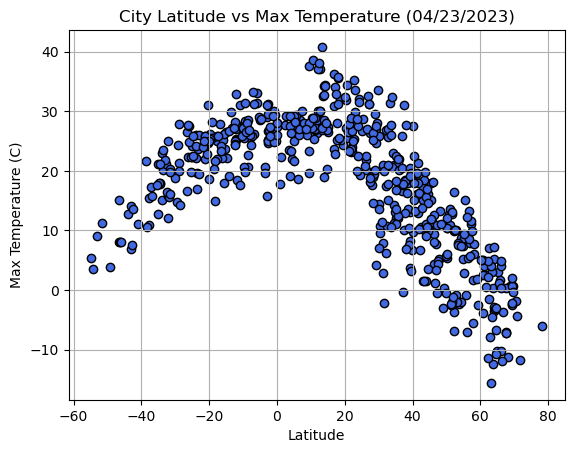

In [35]:
# Build scatter plot for latitude vs. temperature #ME
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Max Temperature (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

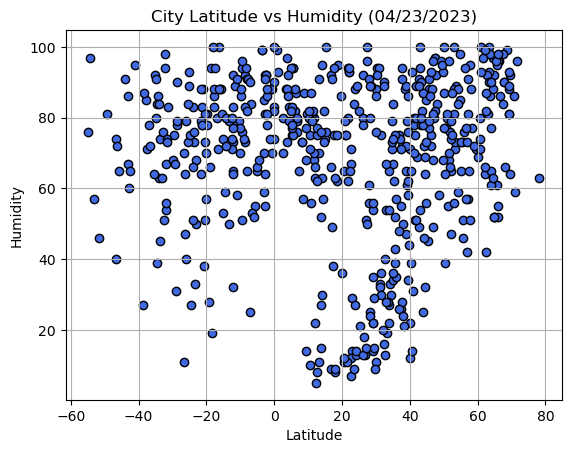

In [36]:
# Build the scatter plots for latitude vs. humidity #ME
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Humidity (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

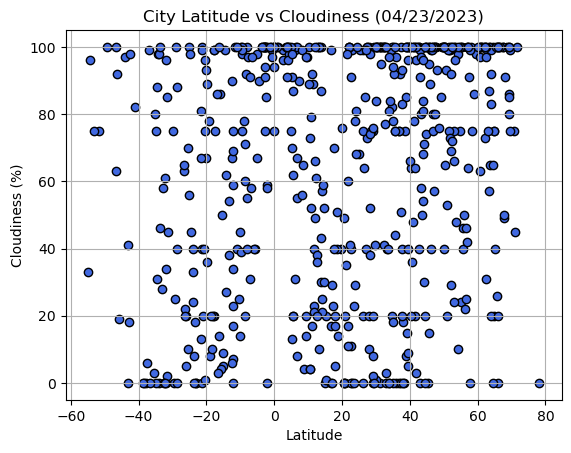

In [37]:
# Build the scatter plots for latitude vs. cloudiness #ME
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Cloudiness (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

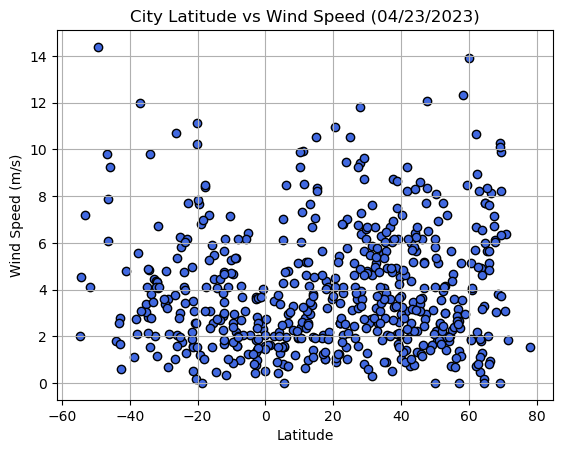

In [38]:
# Build the scatter plots for latitude vs. wind speed #ME
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Wind Speed (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [113]:
# Define a function to create Linear Regression plots
def Lin_Regress_n(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(min(x_values), min(y_values)), horizontalalignment='left', verticalalignment='bottom',
                 fontsize=15,color="red", weight='bold')
    print(f"The r-value is: {rvalue**2}")
    


In [107]:
def Lin_Regress_s(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(max(x_values), max(y_values)), horizontalalignment='right', verticalalignment='top',
                 fontsize=15,color="red", weight='bold')
    print(f"The r-value is: {rvalue**2}")

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad tula,23.0000,-99.7167,29.82,29,99,3.85,MX,1682273174
5,felege neway,6.3000,36.8833,18.62,87,100,0.74,ET,1682273176
7,bethel,41.3712,-73.4140,16.17,78,100,3.09,US,1682273177
8,shenjiamen,29.9576,122.2980,14.45,88,100,4.80,CN,1682273178
12,haiku-pauwela,20.9219,-156.3051,25.58,75,0,0.89,US,1682273179


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,20.10,74,46,3.81,ZA,1682273175
2,inhambane,-23.8650,35.3833,25.99,83,40,4.12,MZ,1682273175
3,saint-joseph,-21.3667,55.6167,25.26,79,100,1.56,RE,1682273176
4,port-aux-francais,-49.3500,70.2167,3.87,81,100,14.39,TF,1682273176
6,blackmans bay,-43.0167,147.3167,6.96,86,41,2.77,AU,1682273177


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7242797223141307


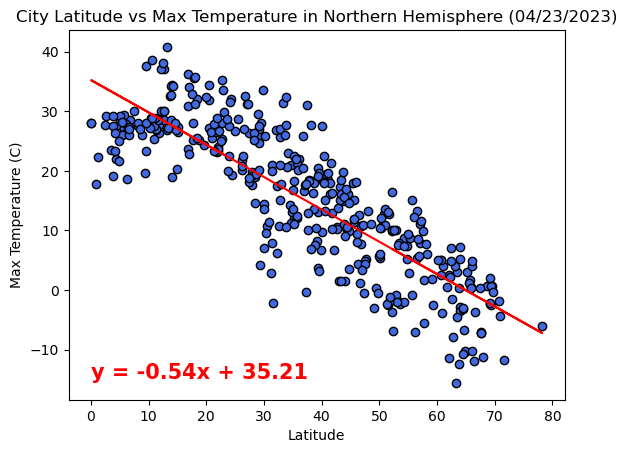

In [114]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_n(x_values, y_values)
# Incorporate the other graph properties #ME
plt.title("City Latitude vs Max Temperature in the Northern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')


plt.show()

The r-value is: 0.6046775920680224


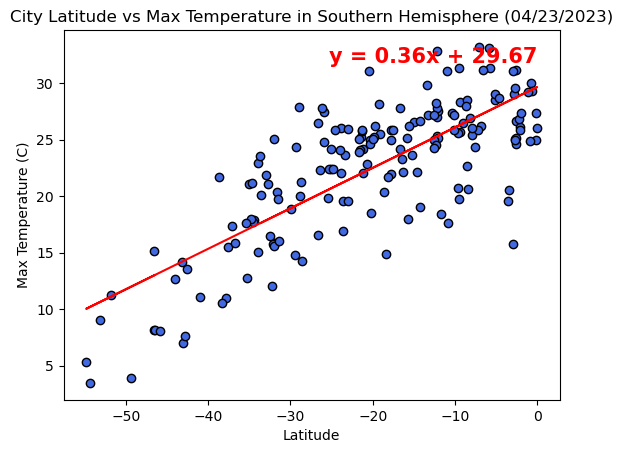

In [108]:
# Linear regression on Southern Hemisphere
# Linear regression on Northern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Max Temp"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_s(x_values, y_values)
# Incorporate the other graph properties #ME
plt.title("City Latitude vs Max Temperature in the Southern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Max Temperature (C)')


plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.033077998009792046


Text(0, 0.5, 'Humidity')

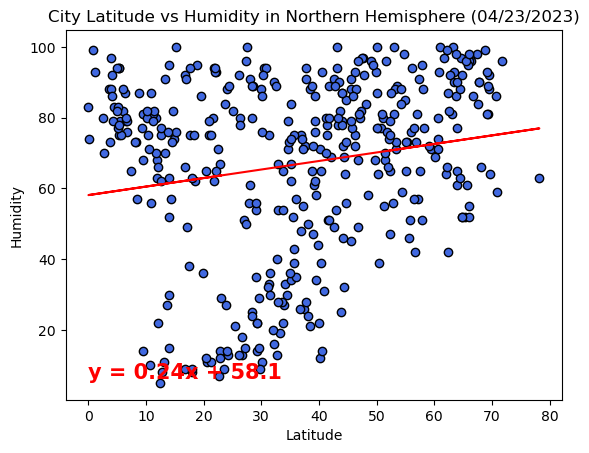

In [117]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_n(x_values, y_values)

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Humidity in the Northern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

The r-value is: 0.029579936209192807


Text(0, 0.5, 'Humidity')

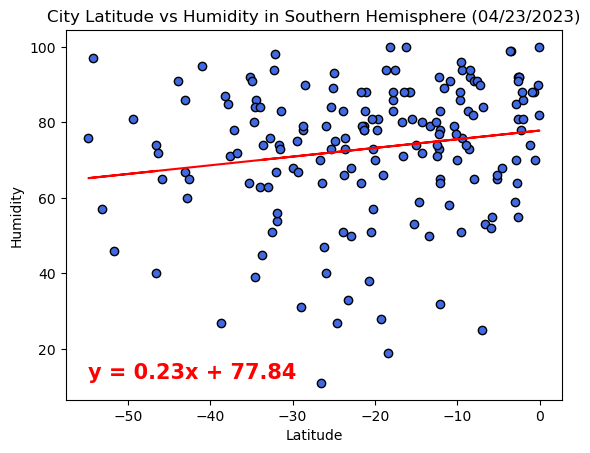

In [118]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Humidity"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_n(x_values, y_values)

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Humidity in the Southern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03163472725011031


Text(0, 0.5, 'Cloudiness (%)')

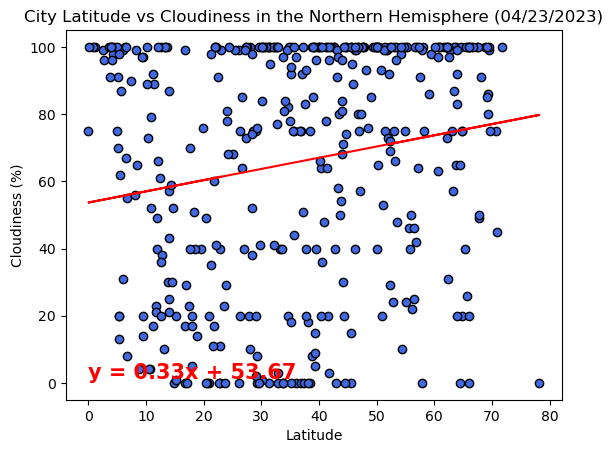

In [119]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_n(x_values, y_values)

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Cloudiness in the Northern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

The r-value is: 0.059587312952951096


Text(0, 0.5, 'Cloudiness (%)')

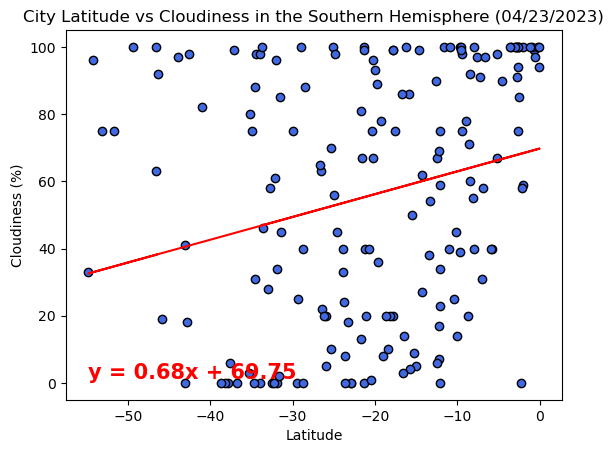

In [120]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Cloudiness"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')

#LinRegress
Lin_Regress_n(x_values, y_values)

# Incorporate the other graph properties #ME
plt.title("City Latitude vs Cloudiness in the Southern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.010480518648839917


Text(0, 0.5, 'Wind Speed (m/s)')

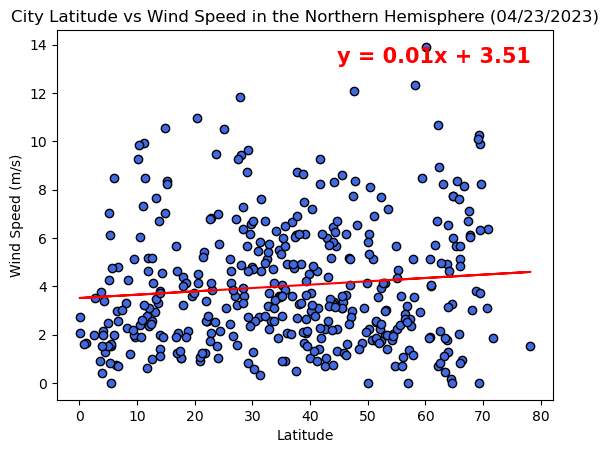

In [121]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"].astype("float")
y_values = northern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_s(x_values, y_values)
# Incorporate the other graph properties #ME
plt.title("City Latitude vs Wind Speed in the Northern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

The r-value is: 0.08299084465352759


Text(0, 0.5, 'Wind Speed (m/s)')

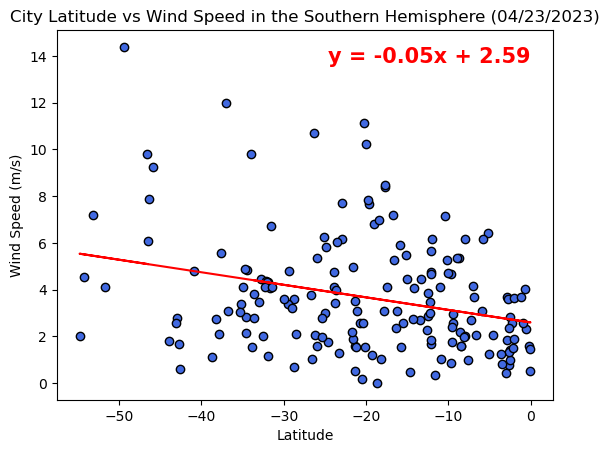

In [122]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"].astype("float")
y_values = southern_hemi_df["Wind Speed"].astype("float")
plt.scatter(x_values, y_values, marker='o', edgecolor='black', linewidth=1, facecolor='royalblue')
# line Regress
Lin_Regress_s(x_values, y_values)
# Incorporate the other graph properties #ME
plt.title("City Latitude vs Wind Speed in the Southern Hemisphere (04/23/2023)")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** YOUR RESPONSE HERE